In [2]:
import pandas as pd

In [140]:
df = pd.read_csv('dataset.csv')
df.year = df.year.astype('int32')
df.shape

(1472, 7)

In [141]:
df = df.dropna()
df.shape

(1417, 7)

In [26]:
df.head()

,file,title,author,text,main_type,sub_type,year
0,herder_humanitaet04_1794.TEI-P5.xml,Briefe zu Beförderung der Humanität,Johann Gottfried von Herder,40. N eulich lernt' ich in der Geſellſchaft un...,Fachtext,Philosophie,1794
1,nettelbeck_lebensbeschreibung03_1823.TEI-P5.xml,"Joachim Nettelbeck, Bürger zu Colberg",Joachim Nettelbeck,"Vorbericht des Herausgebers. D ie Bedingung, w...",Belletristik,(Auto)biographie,1823
2,thomasius_einleitungvernufftlehre_1691.TEI-P5.xml,Einleitung zu der Vernunfft-Lehre,Christian Thomasius,An Seine Magnificenz Herrn Buͤrgemeiſter ADRIA...,Fachtext,Philosophie,1691
3,wallenrodt_fritz01_1800.TEI-P5.xml,"Fritz, der Mann wie er nicht seyn sollte oder ...",Johanna Isabella Eleonore von Wallenrodt,"Erſter Abſchnitt, welcher ſtatt einer Vorrede ...",Belletristik,Roman,1800
4,kleist_kaethchen_1810.TEI-P5.xml,Das Käthchen von Heilbronn oder die Feuerprobe,Heinrich von Kleist,"Perſonen : Der Kaiſer . Gebhardt , Erzbiſchoff...",Belletristik,Drama,1810


# Maintypes

In [27]:
df.main_type.unique()

array(['Fachtext', 'Belletristik', 'Gebrauchsliteratur', 'Journalismus',
       'Gelegenheitsschrift'], dtype=object)

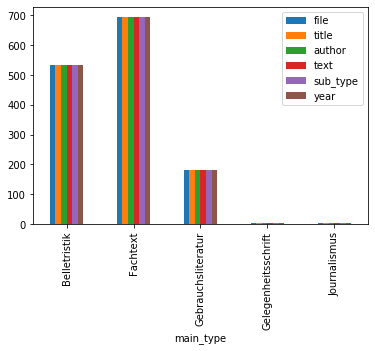

In [28]:
df.groupby('main_type').count().plot(kind='bar')

# Subtypes

In [29]:
df.groupby(['main_type', 'sub_type']).describe()

year                                   \
                                     count         mean         std     min   
main_type           sub_type                                                  
Belletristik        (Auto)biographie  22.0  1826.000000   33.852622  1789.0   
                    Autobiographie     5.0  1790.400000   32.531523  1738.0   
                    Biographie         2.0  1774.500000   74.246212  1722.0   
                    Drama             80.0  1799.262500   72.762096  1647.0   
                    Epos               3.0  1801.666667   36.665151  1780.0   
...                                    ...          ...         ...     ...   
Gebrauchsliteratur  Zoologie           2.0  1780.500000  123.743687  1693.0   
                    Ökonomie           1.0  1616.000000         NaN  1616.0   
Gelegenheitsschrift Fest               1.0  1678.000000         NaN  1678.0   
                    Vertrag            1.0  1648.000000         NaN  1648.0   
Journalismus        Gesellschaft       5.0  1850.000000   26.673957  1832.0   

                                                                        
                                          25%     50%      75%     max  
main_type           sub_type                                            
Belletristik        (Auto)biographie  1798.25  1817.5  1836.00  1898.0  
                    Autobiographie    1783.00  1804.0  1804.00  1823.0  
                    Biographie        1748.25  1774.5  1800.75  1827.0  
                    Drama             1771.00  1804.5  1859.50  1903.0  
                    Epos              1780.50  1781.0  1812.50  1844.0  
...                                       ...     ...      ...     ...  
Gebrauchsliteratur  Zoologie          1736.75  1780.5  1824.25  1868.0  
                    Ökonomie          1616.00  1616.0  1616.00  1616.0  
Gelegenheitsschrift Fest              1678.00  1678.0  1678.00  1678.0  
                    Vertrag           1648.00  1648.0  1648.00  1648.0  
Journalismus        Gesellschaft      1832.00  1841.0  1849.00  1896.0  

[105 rows x 8 columns]

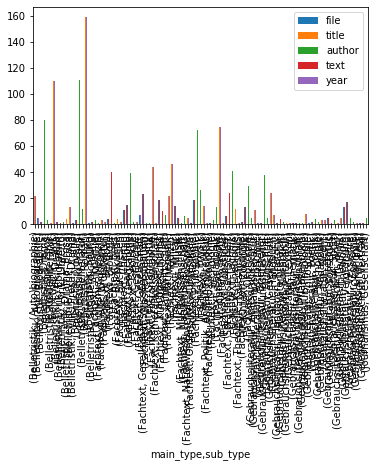

In [30]:
df.groupby(['main_type', 'sub_type']).count().plot(kind='bar')

# Years

In [31]:
max(df.year), min(df.year)

(1913, 1598)

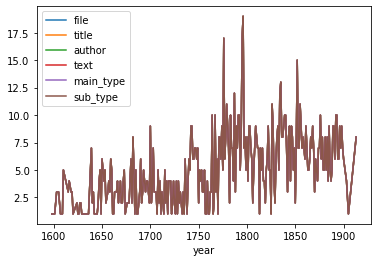

In [32]:
df.groupby('year').count().plot()

# Create periods

In [142]:
periods = []
start_year = 1600
end_year = 1649
periods.append((start_year, end_year))
for i in range(5):
    start_year += 50
    end_year = start_year + 49
    
    periods.append((start_year, end_year))
periods

[(1600, 1649),
 (1650, 1699),
 (1700, 1749),
 (1750, 1799),
 (1800, 1849),
 (1850, 1899)]

In [143]:
def create_period_column(df, periods):
    for index, (start_year, end_year) in enumerate(periods):
        df.loc[df[(df.year >= start_year) & (df.year < end_year)].index, 'period'] = f'P{index + 1}'
    return df

In [144]:
df = create_period_column(df, periods)
df.dropna(subset=['period'], inplace=True)

In [145]:
df.head()

,file,title,author,text,main_type,sub_type,year,period
0,herder_humanitaet04_1794.TEI-P5.xml,Briefe zu Beförderung der Humanität,Johann Gottfried von Herder,40. N eulich lernt' ich in der Geſellſchaft un...,Fachtext,Philosophie,1794,P4
1,nettelbeck_lebensbeschreibung03_1823.TEI-P5.xml,"Joachim Nettelbeck, Bürger zu Colberg",Joachim Nettelbeck,"Vorbericht des Herausgebers. D ie Bedingung, w...",Belletristik,(Auto)biographie,1823,P5
2,thomasius_einleitungvernufftlehre_1691.TEI-P5.xml,Einleitung zu der Vernunfft-Lehre,Christian Thomasius,An Seine Magnificenz Herrn Buͤrgemeiſter ADRIA...,Fachtext,Philosophie,1691,P2
3,wallenrodt_fritz01_1800.TEI-P5.xml,"Fritz, der Mann wie er nicht seyn sollte oder ...",Johanna Isabella Eleonore von Wallenrodt,"Erſter Abſchnitt, welcher ſtatt einer Vorrede ...",Belletristik,Roman,1800,P5
4,kleist_kaethchen_1810.TEI-P5.xml,Das Käthchen von Heilbronn oder die Feuerprobe,Heinrich von Kleist,"Perſonen : Der Kaiſer . Gebhardt , Erzbiſchoff...",Belletristik,Drama,1810,P5


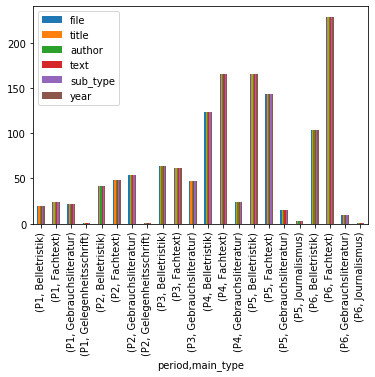

In [146]:
df.groupby(['period', 'main_type']).count().plot(kind='bar')

# First Attempt:
### Fachtexte and Belletristik over all periods

In [147]:
df_filtered = df[(df.main_type == 'Belletristik') | (df.main_type == 'Fachtext')]
df_filtered.head()

,file,title,author,text,main_type,sub_type,year,period
0,herder_humanitaet04_1794.TEI-P5.xml,Briefe zu Beförderung der Humanität,Johann Gottfried von Herder,40. N eulich lernt' ich in der Geſellſchaft un...,Fachtext,Philosophie,1794,P4
1,nettelbeck_lebensbeschreibung03_1823.TEI-P5.xml,"Joachim Nettelbeck, Bürger zu Colberg",Joachim Nettelbeck,"Vorbericht des Herausgebers. D ie Bedingung, w...",Belletristik,(Auto)biographie,1823,P5
2,thomasius_einleitungvernufftlehre_1691.TEI-P5.xml,Einleitung zu der Vernunfft-Lehre,Christian Thomasius,An Seine Magnificenz Herrn Buͤrgemeiſter ADRIA...,Fachtext,Philosophie,1691,P2
3,wallenrodt_fritz01_1800.TEI-P5.xml,"Fritz, der Mann wie er nicht seyn sollte oder ...",Johanna Isabella Eleonore von Wallenrodt,"Erſter Abſchnitt, welcher ſtatt einer Vorrede ...",Belletristik,Roman,1800,P5
4,kleist_kaethchen_1810.TEI-P5.xml,Das Käthchen von Heilbronn oder die Feuerprobe,Heinrich von Kleist,"Perſonen : Der Kaiſer . Gebhardt , Erzbiſchoff...",Belletristik,Drama,1810,P5


In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler


In [159]:
from tqdm import tqdm_notebook

train_period = 'P1'
train_df = df_filtered[df_filtered.period == train_period]

tf = TfidfVectorizer(max_features=7500)
X_train = tf.fit_transform(train_df.text)
y_train = train_df.main_type.to_numpy()

clf = make_pipeline(RandomUnderSampler(), LogisticRegression(C=4))
clf.fit(X_train, y_train)

scores_belletristik = []
scores_fachtexte = []
scores = []
for test_period in tqdm_notebook(list(sorted(df.period.unique()))):
    test_df = df_filtered[df_filtered.period == test_period]

    X_test = tf.transform(test_df.text)
    y_test = test_df.main_type.to_numpy()
    
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='macro')
    scores.append(score)
    report = classification_report(y_test, y_pred, output_dict=True)

    scores_belletristik.append(report['Belletristik']['f1-score'])
    scores_fachtexte.append(report['Fachtext']['f1-score'])
scores, scores_belletristik, scores_fachtexte

<ipython-input-159-3bad3c6c2c6c>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for test_period in tqdm_notebook(list(sorted(df.period.unique()))):


([0.9083333333333333,
  0.5166760881854155,
  0.3544973544973545,
  0.30699497017195,
  0.36411157478585554,
  0.24287993617869966],
 [0.9,
  0.6885245901639345,
  0.6772486772486772,
  0.6019417475728156,
  0.7006369426751593,
  0.47706422018348627],
 [0.9166666666666666,
  0.3448275862068966,
  0.031746031746031744,
  0.012048192771084336,
  0.027586206896551724,
  0.008695652173913044])

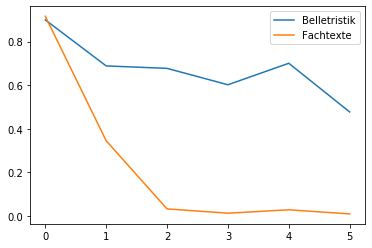

In [160]:
import matplotlib.pyplot as plt
plt.plot(scores_belletristik, label='Belletristik')
plt.plot(scores_fachtexte, label='Fachtexte')
plt.legend()
plt.show()